   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      18

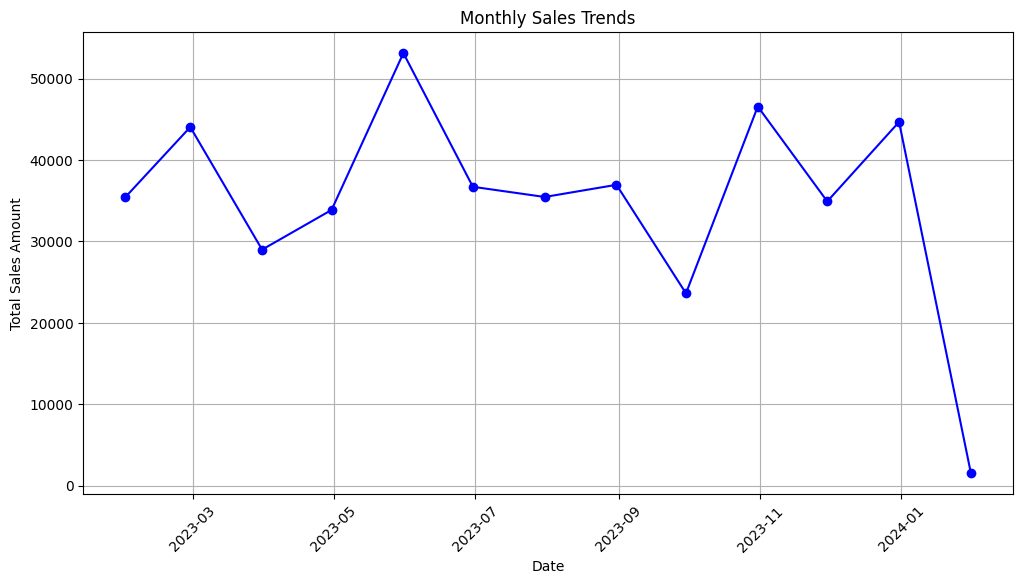

<ipython-input-7-648f190735cf>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


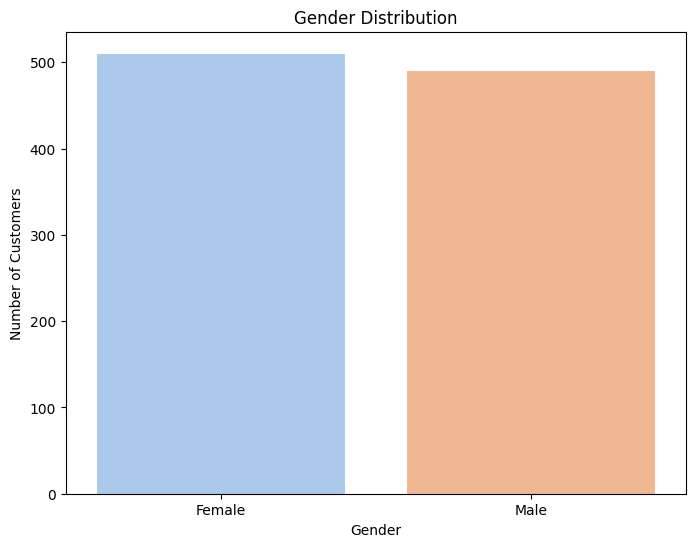

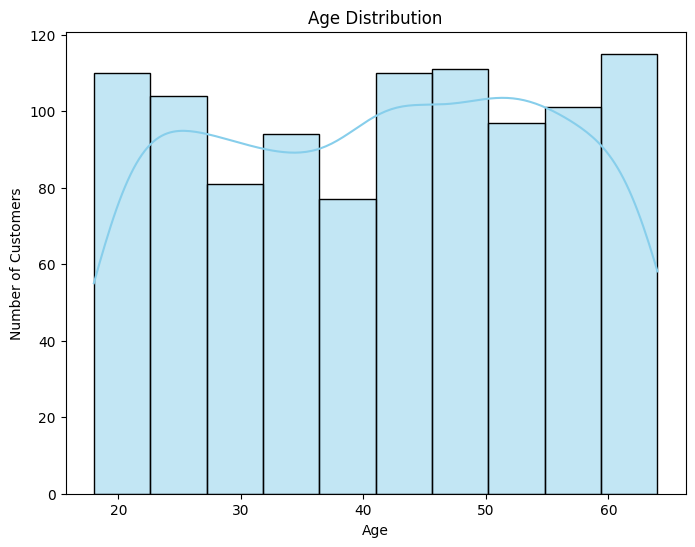

<ipython-input-7-648f190735cf>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_purchases.index, y=gender_purchases.values, palette='pastel')


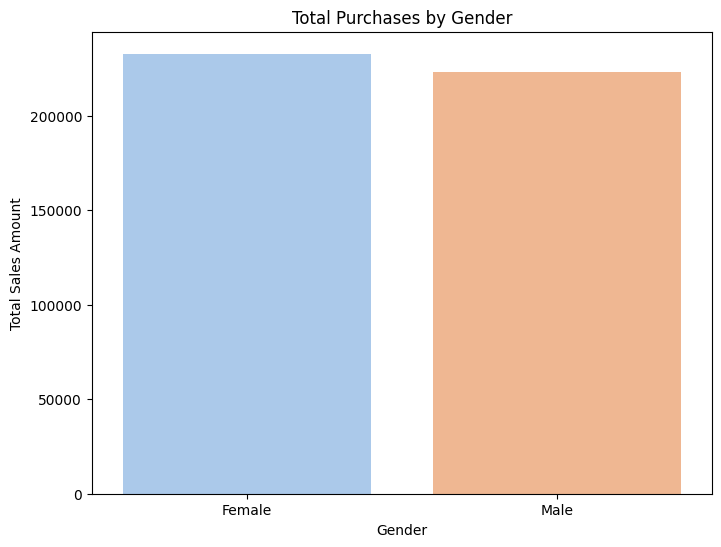

<ipython-input-7-648f190735cf>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_purchases.index, y=age_group_purchases.values, palette='pastel')


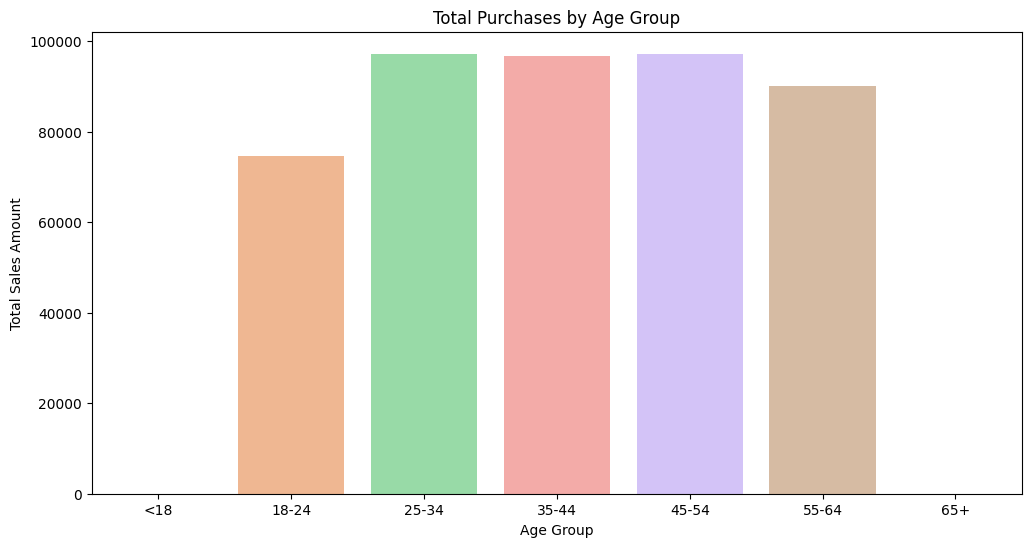

<ipython-input-7-648f190735cf>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='pastel')


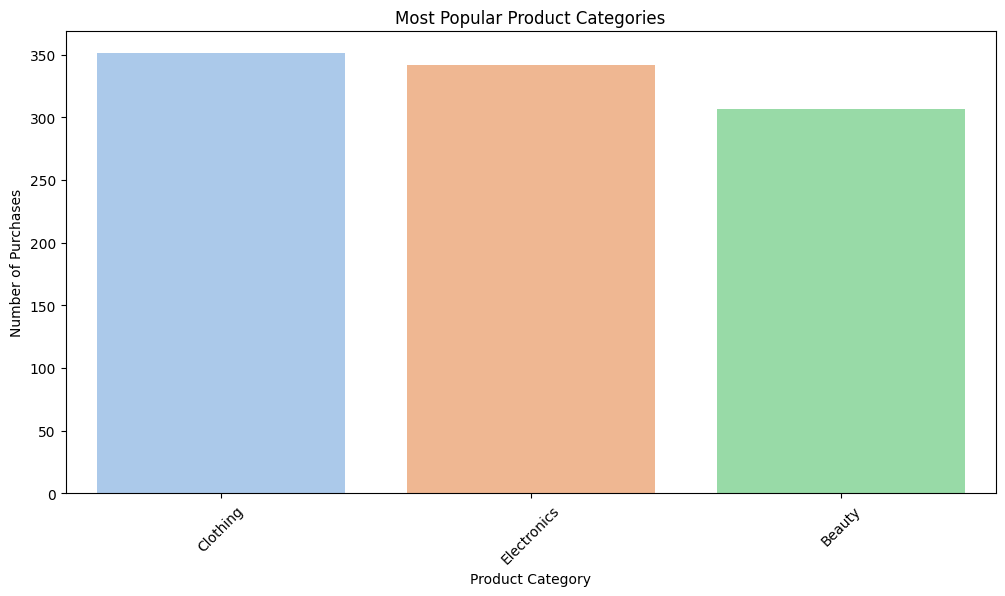

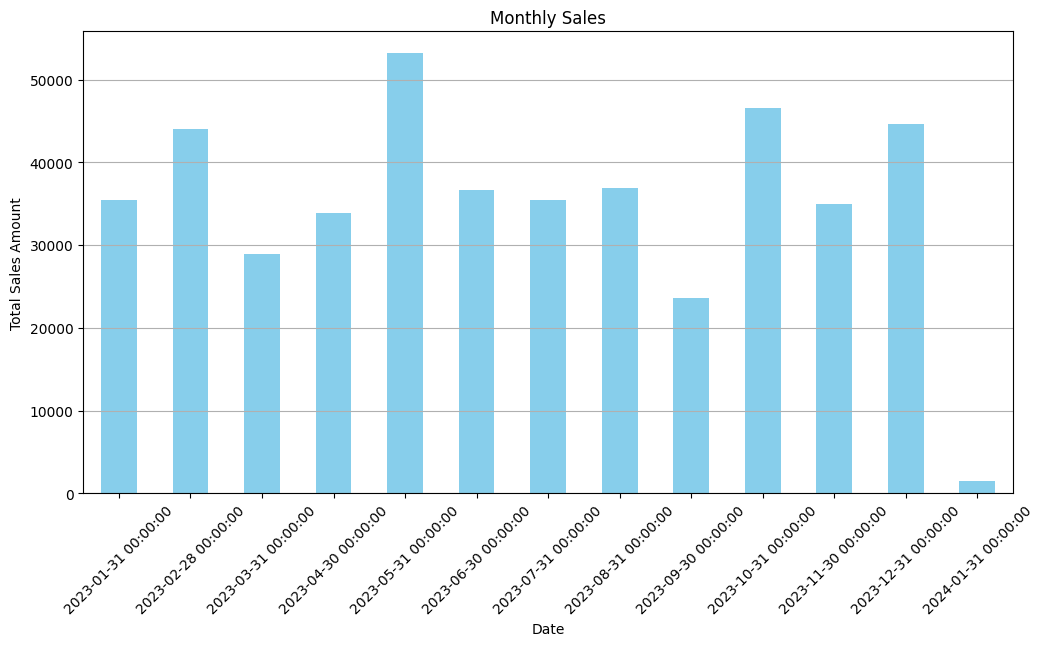

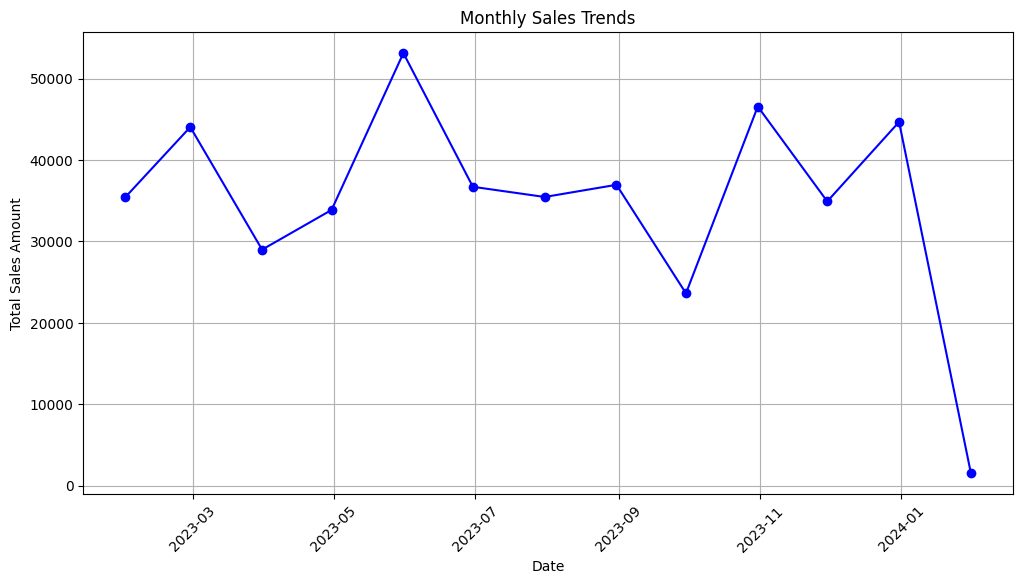

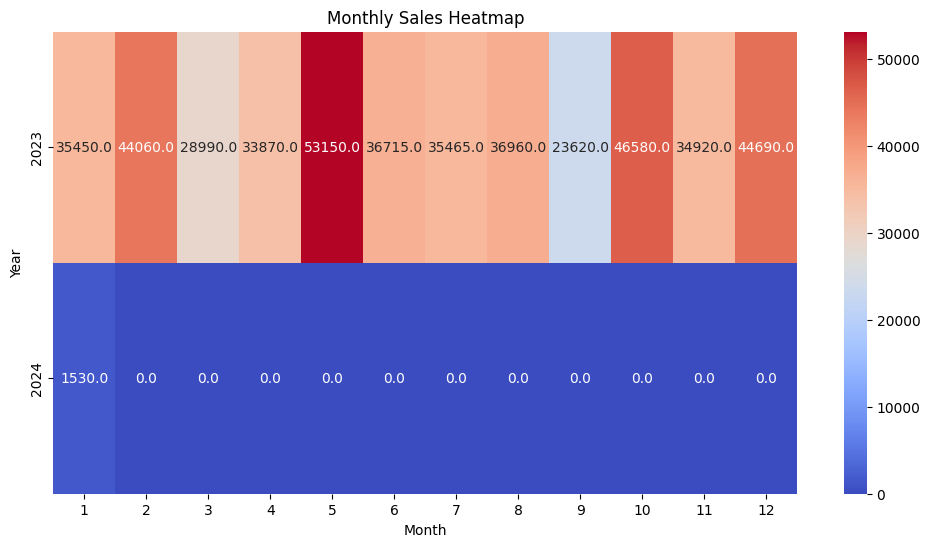

In [7]:
# DATA LOADING AND CLEANING
import pandas as pd

file_path = '/content/retail_sales_dataset.csv'
sales_data = pd.read_csv(file_path)

print(sales_data.head())

print(sales_data.describe())
mean_age = sales_data['Age'].mean()
# print("Mean of Age",mean_age)

# mean_Price = sales_data['Price per Unit'].mean()
# print("Mean of Price",mean_Price)

# mean_Revenue = sales_data['Total Amount'].mean()
# print("Mean of Revenue",mean_Revenue)

# mean_Quantity = sales_data['Quantity'].mean()
# print("Mean of Quantity",mean_Quantity)


# Cleaning (NULLL)
no_of_missing_values = sales_data.isnull().sum()

sales_data['Age'] = sales_data['Age'].fillna(mean_age)


print(no_of_missing_values)

# Cleaning (DUPLICATES)
no_of_duplicated_rows = sales_data.duplicated().sum()
print(no_of_duplicated_rows)

sales_data = sales_data.drop_duplicates()

# Time Series Analysis
import matplotlib.pyplot as plt

# Convert the Date column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set the Date column as the index
sales_data.set_index('Date', inplace=True)

# Resample the data on a monthly basis and calculate the total sales for each month
monthly_sales = sales_data['Total Amount'].resample('M').sum()

# Plot the monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Customer and Product Analysis

# Customer Demographics Analysis

# Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = sales_data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(sales_data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Purchasing Behavior

# Total Purchases by Gender
plt.figure(figsize=(8, 6))
gender_purchases = sales_data.groupby('Gender')['Total Amount'].sum()
sns.barplot(x=gender_purchases.index, y=gender_purchases.values, palette='pastel')
plt.title('Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.show()

# Define age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
sales_data['Age Group'] = pd.cut(sales_data['Age'], bins=bins, labels=labels, right=False)

# Total Purchases by Age Group
plt.figure(figsize=(12, 6))
age_group_purchases = sales_data.groupby('Age Group')['Total Amount'].sum()
sns.barplot(x=age_group_purchases.index, y=age_group_purchases.values, palette='pastel')
plt.title('Total Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.show()

# Most Popular Product Categories
plt.figure(figsize=(12, 6))
product_category_counts = sales_data['Product Category'].value_counts()
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='pastel')
plt.title('Most Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()



# Visualization
import seaborn as sns

# Bar Chart - Monthly Sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Line Plot - Monthly Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Heatmap - Monthly Sales Heatmap
# Create a pivot table with Year-Month as rows and Total Sales Amount as values
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['YearMonth'] = monthly_sales_df['Date'].dt.to_period('M')
sales_pivot = monthly_sales_df.pivot_table(values='Total Amount', index=monthly_sales_df['Date'].dt.year, columns=monthly_sales_df['Date'].dt.month, fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Monthly Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Recommendations
#  Among customers, Most popular products are Clothing, Electronics and then Beauty.
# Company should focus on improving beauty products to gain a decent share in beauty products market.
# More focus on the needs of 25-54 yrs of age groups as they're dominantly engaging in purchasing products
# Company needs to buy more stock in the April month and spend less in the August, March and January.
# With May being the most sales month and September with least sales, company should import stock accordingly
# We require more data for even more precise predictions.